<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/H_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

In [3]:
import pyccl as ccl

In [ ]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


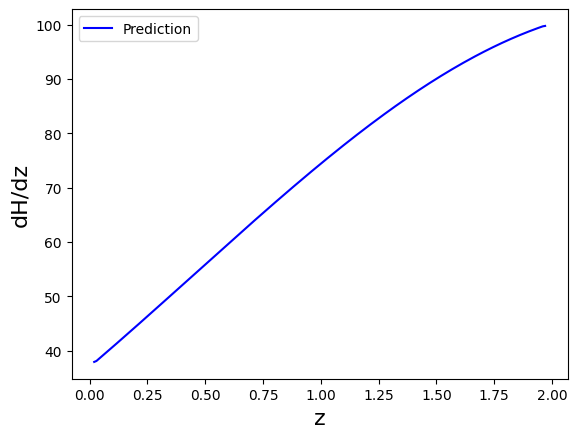

In [13]:
# baixando e nomeando dados reconstruídos de H
hz = np.genfromtxt('/content/drive/MyDrive/Dados/Mock GP/hz_recon_mock.dat', delimiter='\t')

z_hz = hz[:, 0]
h_hz = hz[:, 1]

ehz = hz[:, 2]


# derivada de h
dhz = np.gradient(h_hz, z_hz)


# plot
plt.plot(z_hz, dhz, color='blue', label='Prediction')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('dH/dz', fontsize=16)
plt.legend(loc='best')
plt.show()


Optimized hyperparameters:
theta = [258.25288414   3.50078594]


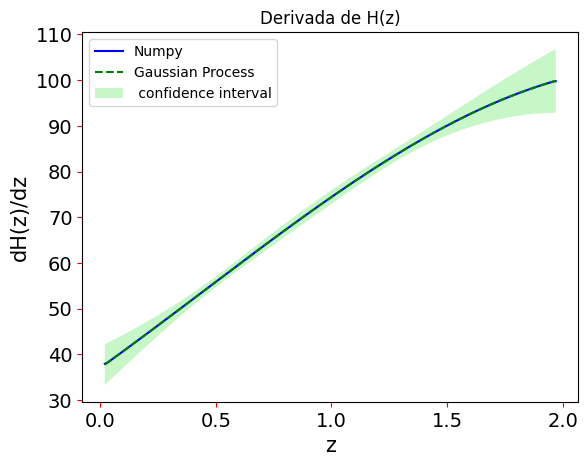

In [15]:
from gapp import dgp

# baixando os dados
data_h = np.genfromtxt('/content/drive/MyDrive/Dados/Mock GP/Hz_mocks.dat', delimiter='\t')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = min(x_h)
xmax = max(x_h)
nstar = 200

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(theta=initheta)

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14,color='red')
plt.plot(z_hz, dhz, color='blue', label='Numpy')
plt.plot(xi, y_pred, color='green', label='Gaussian Process', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label=r' confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('dH(z)/dz', fontsize=15)
plt.legend(loc='best')
plt.title('Derivada de H(z)')
plt.show()